#Data Loading

In [1]:
#data mounting
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#imprt packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#read data
df = pd.read_csv ('/content/drive/MyDrive/Meriskill/Project 3 - HR Analytics-20231023T191817Z-001/HR-Employee-Attrition.csv')

#Step 1 : Data Cleaning

In [4]:
#explore the data
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
#Data Dimension
df.shape

(1470, 35)

In [6]:
# Check for dubplicated data
df.duplicated().sum()

0

In [7]:
# Check the df to see if there are missing values
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [8]:
##checking and dealing inconsistent data type if needed
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [9]:
#checking and dealing with inconsistencies in categorical values
object_cols = df.select_dtypes("object").columns
for column in object_cols:
  print(column, df[column].unique())

Attrition ['Yes' 'No']
BusinessTravel ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department ['Sales' 'Research & Development' 'Human Resources']
EducationField ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender ['Female' 'Male']
JobRole ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus ['Single' 'Married' 'Divorced']
Over18 ['Y']
OverTime ['Yes' 'No']


In [10]:
#replacing 'y' with 'yes' in column 'over18'
df ['Over18']= df['Over18'].replace ('Y', 'Yes')

In [11]:
#Cheking and dealing with inappropriate or unusual data points if needed
num_cols = df.select_dtypes("number").columns
df[num_cols].describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


#Step 2 Data Visualization

In [12]:
#Plot a correlation map for all numeric variable Overtime
num_cols = df.select_dtypes("number")
correlation_matrix = num_cols.corr()


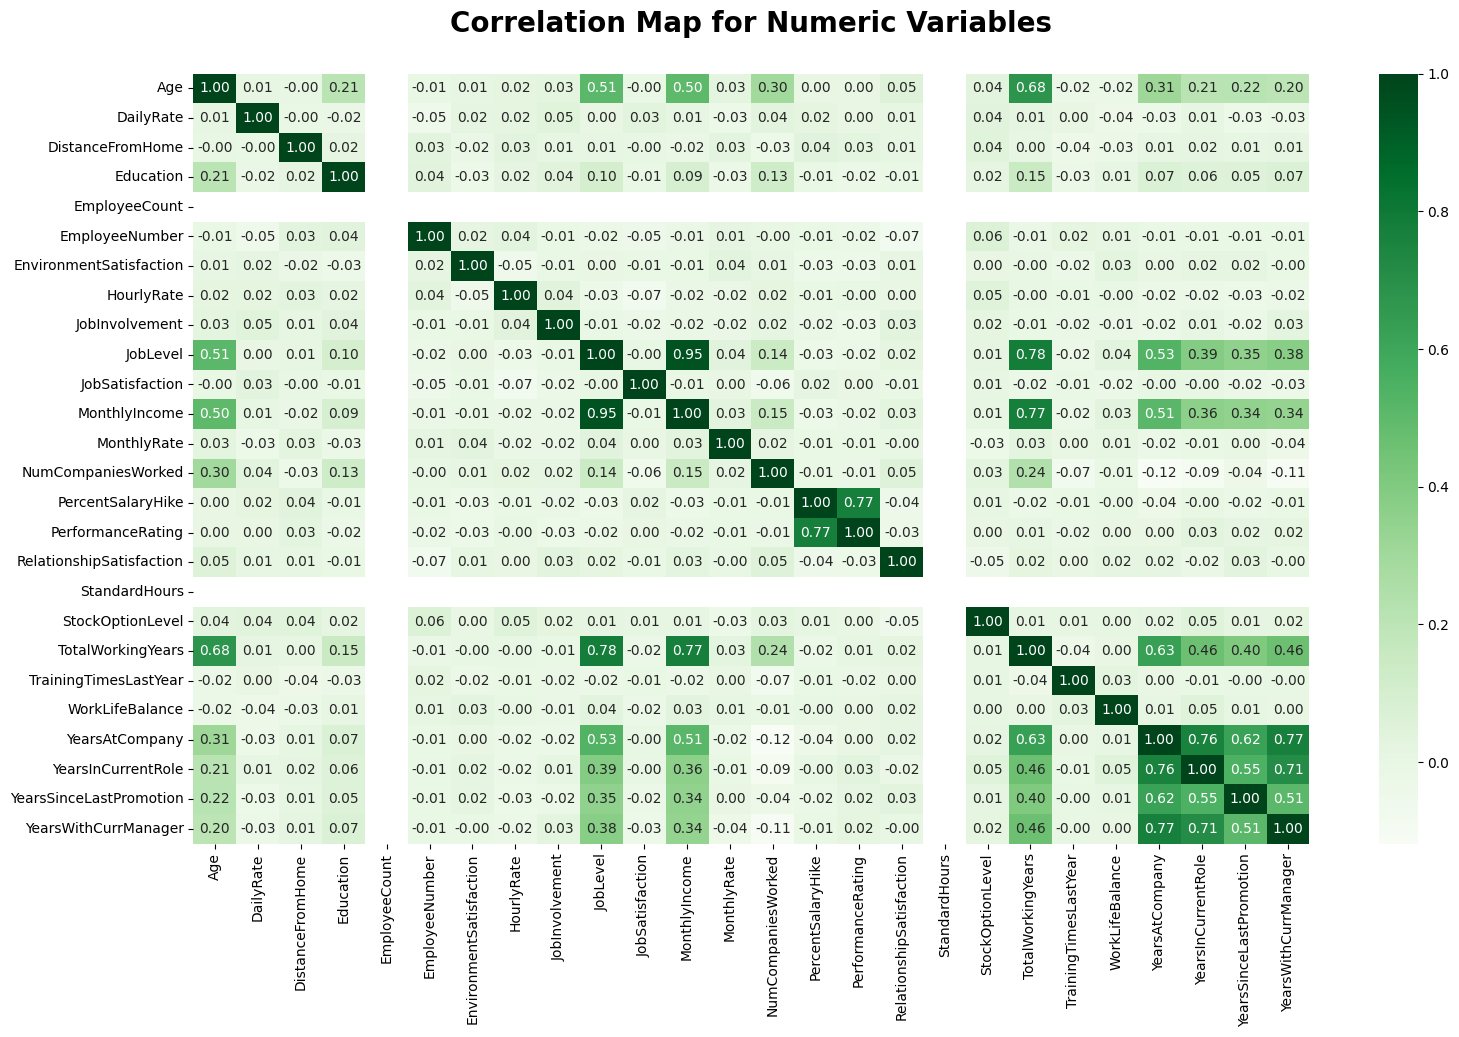

In [13]:
# Set up the matplotlib figure
plt.figure(figsize=(18, 10))
# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap="Greens", fmt=".2f")
# Show the plot
plt.title("Correlation Map for Numeric Variables",fontsize=20, fontweight='bold', color='black',  pad = 30)
plt.show()

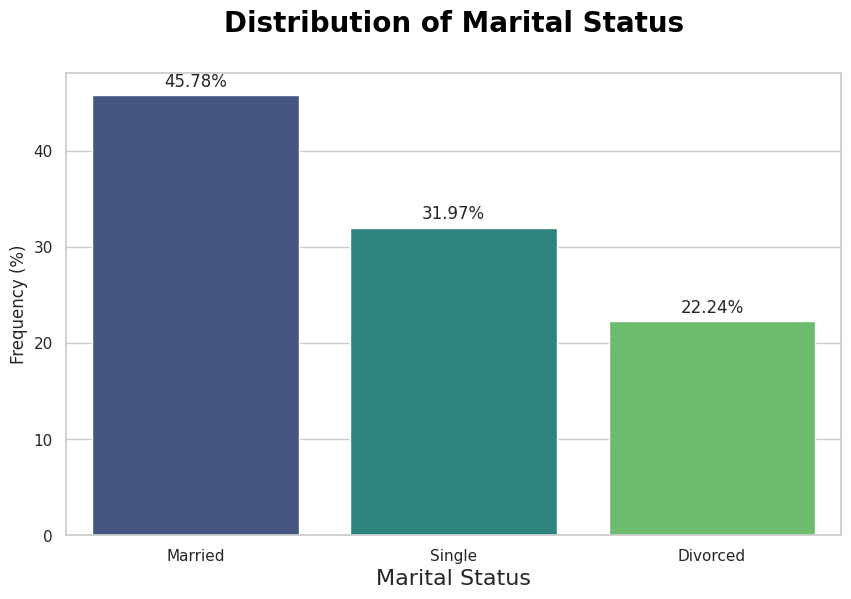

In [14]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")  # Set the style to whitegrid for a cleaner look

# Calculate frequencies as percentages
total_rows = len(df)
freq_data = df['MaritalStatus'].value_counts() / total_rows * 100

# Create a bar plot with frequencies
ax = sns.barplot(x=freq_data.index, y=freq_data.values, palette='viridis')

# Annotate each bar with its percentage
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Set plot labels and title
plt.xlabel('Marital Status',fontsize=16)
plt.xlabel('Marital Status',fontsize=16)
plt.ylabel('Frequency (%)')
plt.title('Distribution of Marital Status',fontsize=20, fontweight='bold', color='black', pad = 30)

# Show the plot
plt.show()


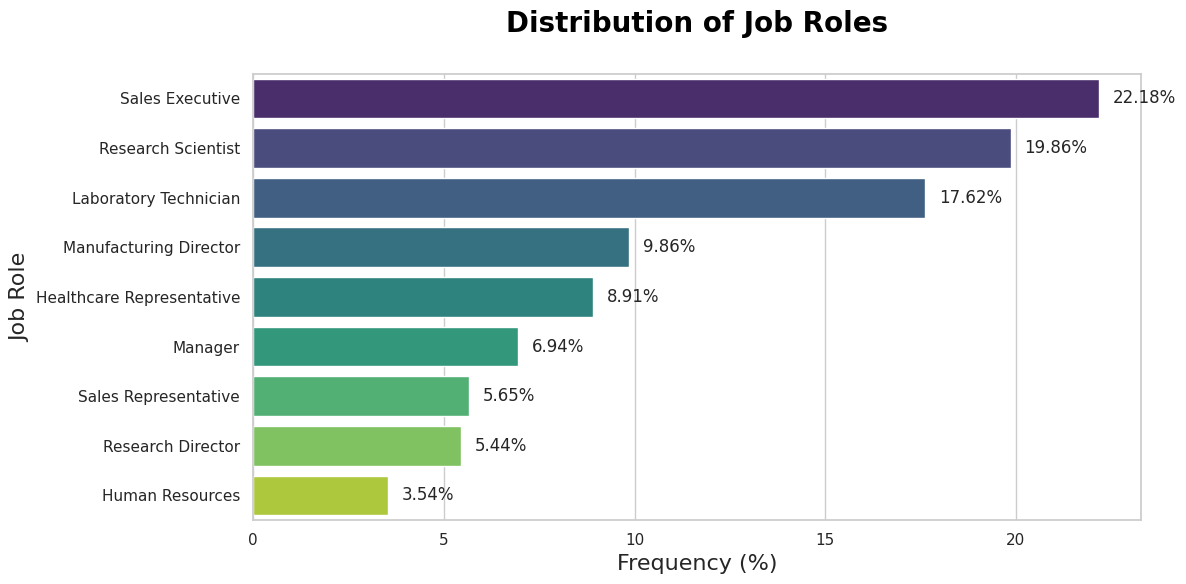

In [15]:
#barplot of Distribution of Job Roles
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")  # Set the style to whitegrid for a cleaner look

# Calculate frequencies as percentages
total_rows = len(df)
freq_data_job = df['JobRole'].value_counts() / total_rows * 100

# Create a bar plot with frequencies
ax = sns.barplot(y=freq_data_job.index, x=freq_data_job.values, palette='viridis')

# Annotate each bar with its percentage
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}%', (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='left', va='center', xytext=(10, 0), textcoords='offset points')
# Set plot labels and title
plt.ylabel('Job Role',fontsize=16)
plt.xlabel('Frequency (%)',fontsize=16)
plt.title('Distribution of Job Roles',fontsize=20, fontweight='bold', color='black', pad = 30)


# Show the plot
plt.tight_layout()
plt.show()


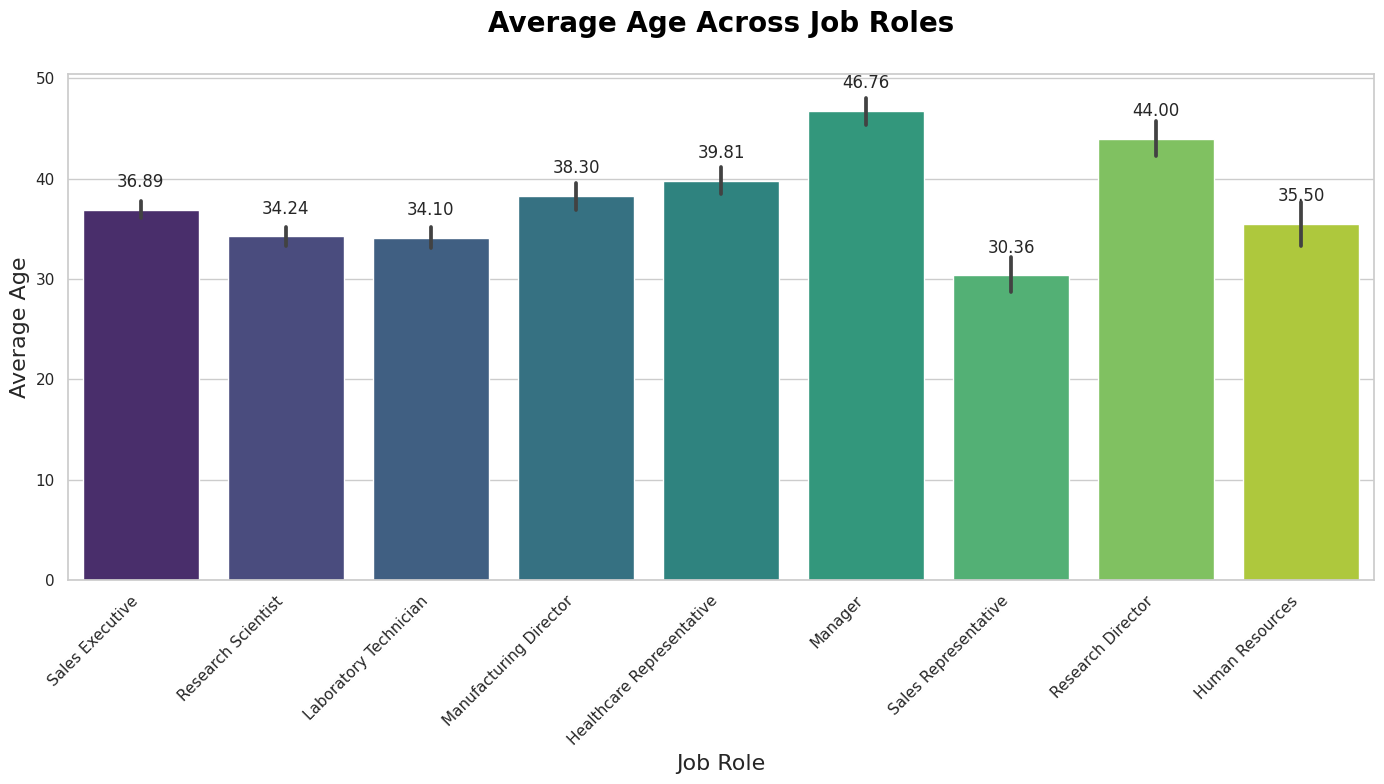

In [16]:
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")  # Set the style to whitegrid for a cleaner look

# Create a bar plot showing the average age for each job role
ax = sns.barplot(x='JobRole', y='Age', data=df, palette='viridis')

# Annotate each bar with its average age
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 20), textcoords='offset points'
                )

# Set plot labels and title
plt.xlabel('Job Role',fontsize=16)
plt.ylabel('Average Age',fontsize=16)
plt.title('Average Age Across Job Roles',fontsize=20, fontweight='bold', color='black', pad = 30)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


<Figure size 1400x800 with 0 Axes>

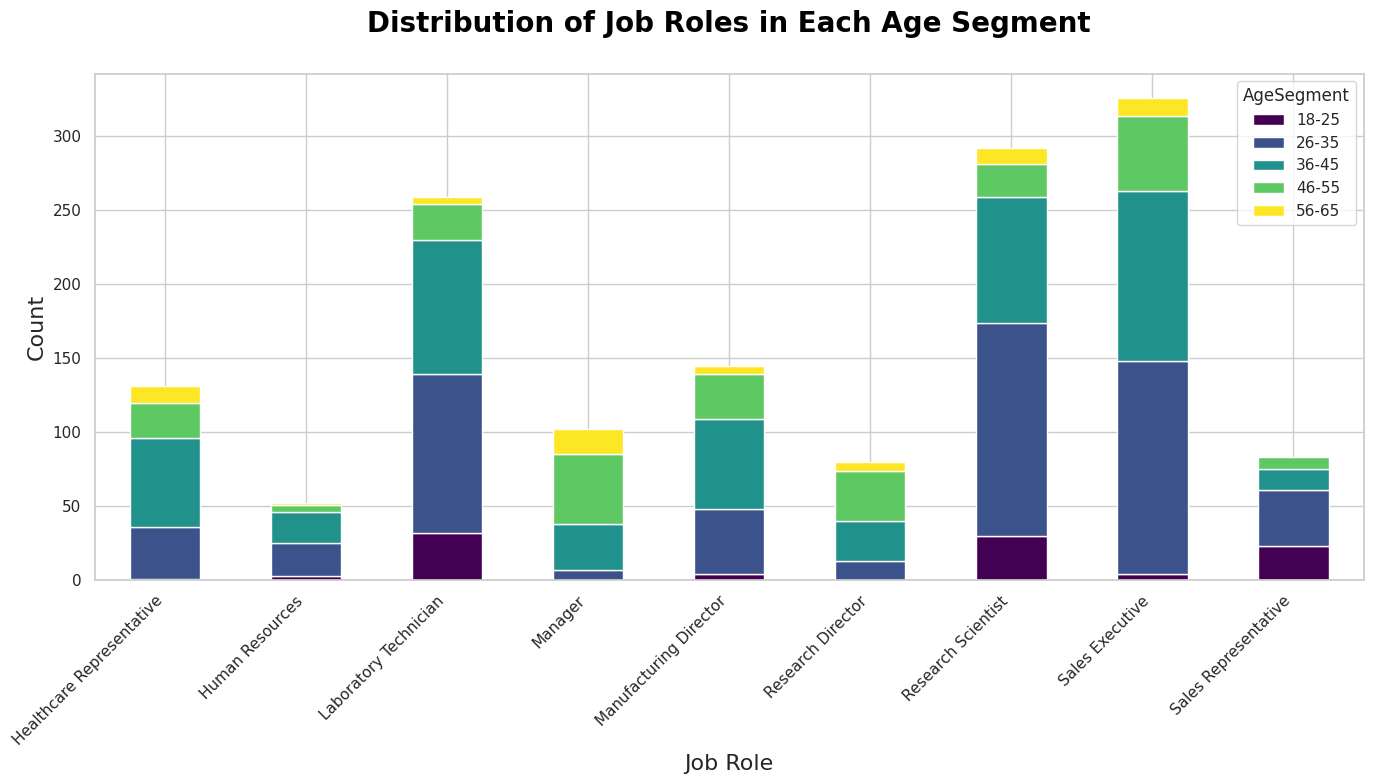

In [18]:
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")  # Set the style to whitegrid for a cleaner look

bins = [18, 25, 35, 45, 55, 65, 100]  # Define your age segments
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '65+']  # Labels for segments

# Create a new column 'AgeSegment' based on the defined bins and labels
df['AgeSegment'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Create a crosstab to get counts for each JobRole-AgeSegment combination
cross_tab = pd.crosstab(df['JobRole'], df['AgeSegment'])

# Create a stacked bar plot
ax = cross_tab.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')


# Set plot labels and title
plt.xlabel('Job Role',fontsize=16)
plt.ylabel('Count',fontsize=16)
plt.title('Distribution of Job Roles in Each Age Segment',fontsize=20, fontweight='bold', color='black', pad = 30)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


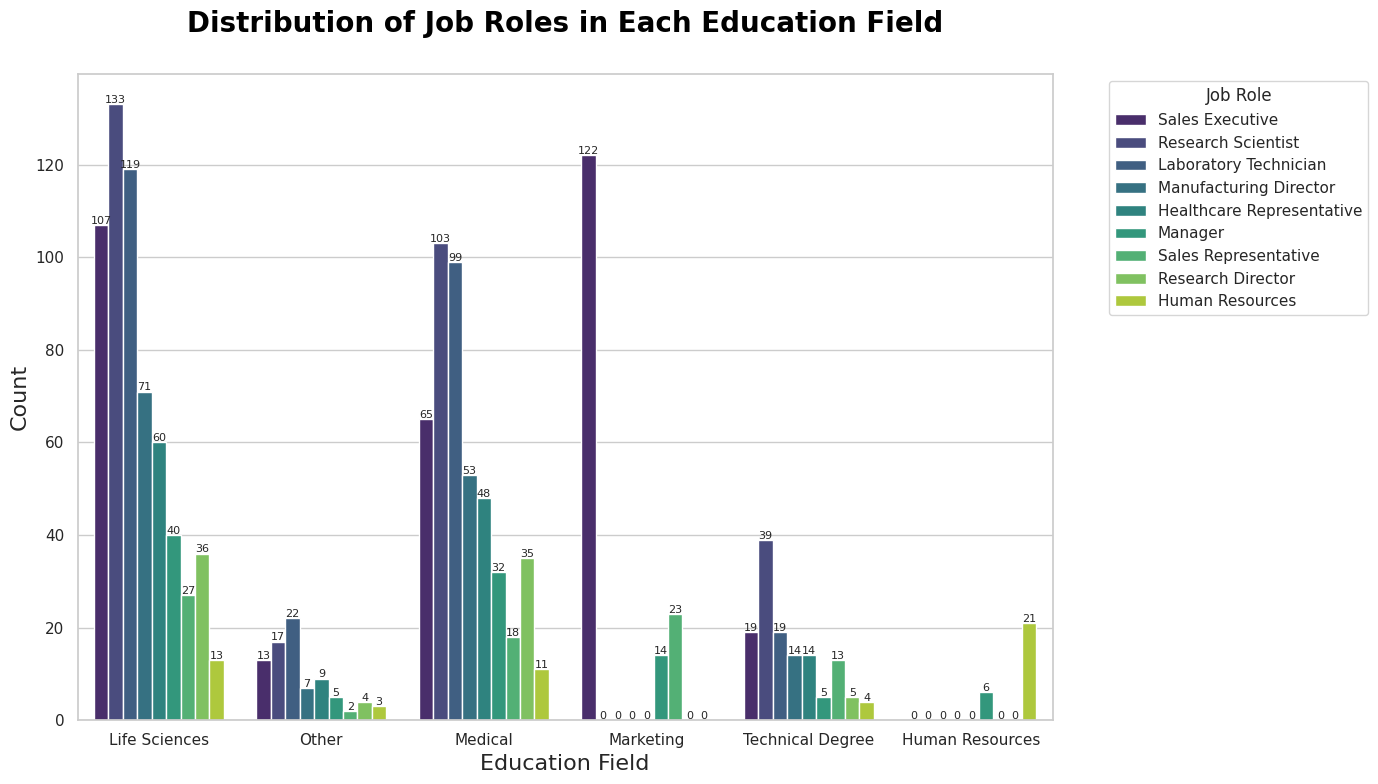

In [19]:
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")  # Set the style to whitegrid for a cleaner look

# Create a grouped bar plot
ax = sns.countplot(x='EducationField', hue='JobRole', data=df, palette='viridis')

# Annotate each bar with its average age
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 3), textcoords='offset points', fontsize=8
                )
# Set plot labels and title
plt.xlabel('Education Field',fontsize=16)
plt.ylabel('Count',fontsize=16)
plt.title('Distribution of Job Roles in Each Education Field',fontsize=20, fontweight='bold', color='black', pad = 30)


# Show the plot with a legend
plt.legend(title='Job Role', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


<Figure size 1600x800 with 0 Axes>

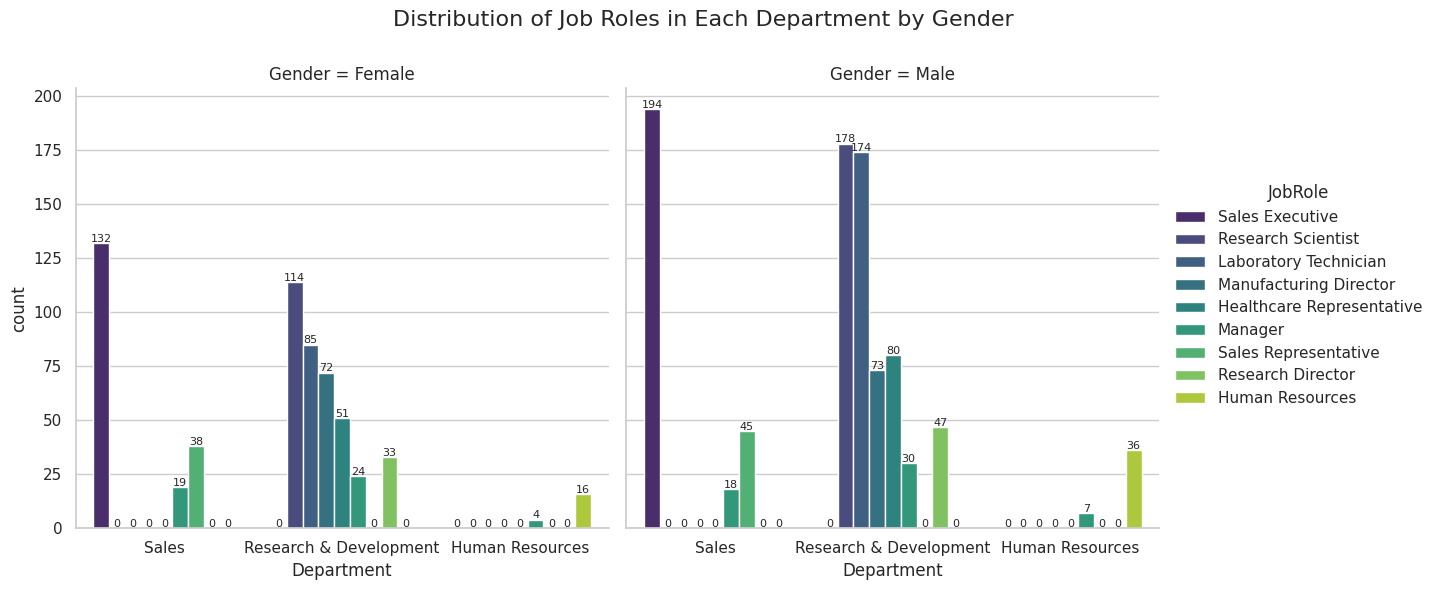

In [20]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")  # Set the style to whitegrid for a cleaner look

# Create a catplot
g=sns.catplot(x='Department', hue='JobRole', col='Gender', data=df, kind='count', palette='viridis', height=6, aspect=1)

# Annotate each bar with its count
for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 3), textcoords='offset points', fontsize=8)

# Set plot labels and title
plt.subplots_adjust(top=0.85)
plt.suptitle('Distribution of Job Roles in Each Department by Gender', fontsize=16)
plt.xlabel('Department')
plt.ylabel('Count')

# Show the plot
plt.show()


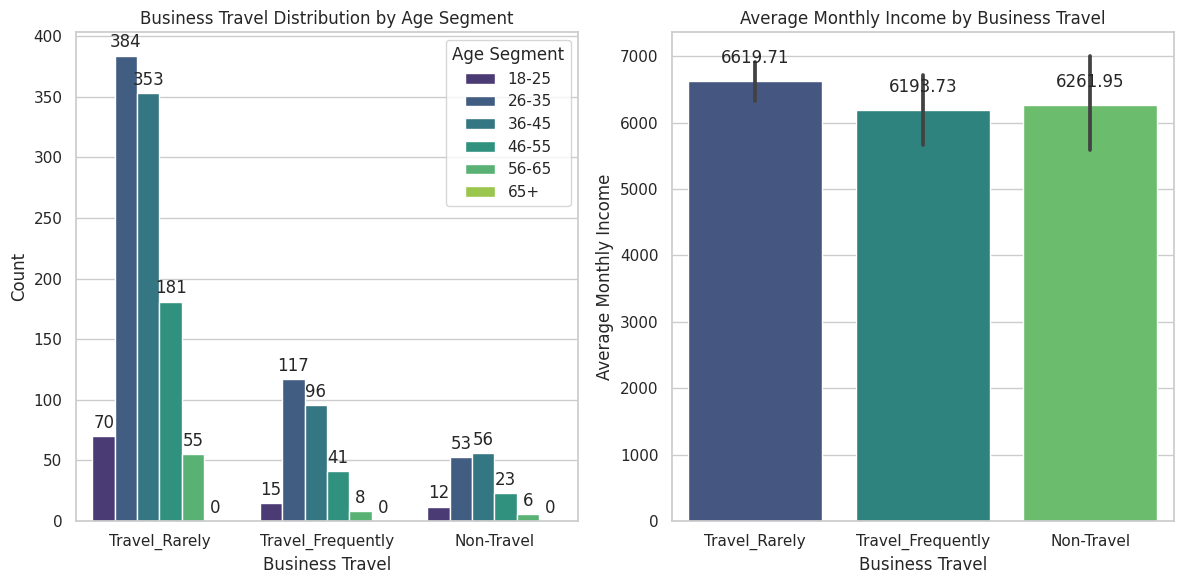

In [21]:

# Create age segments
bins = [18, 25, 35, 45, 55, 65, 100]  # Define your age segments
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '65+']  # Labels for segments
df['AgeSegment'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Set the style for seaborn (optional)
sns.set(style="whitegrid")

# Plot BusinessTravel against AgeSegment and MonthlyIncome
plt.figure(figsize=(12, 6))

# Bar plot for BusinessTravel and AgeSegment
plt.subplot(1, 2, 1)
ax1= sns.countplot(x='BusinessTravel', hue='AgeSegment', data=df,palette='viridis')
plt.title('Business Travel Distribution by Age Segment')
plt.xlabel('Business Travel')
plt.ylabel('Count')
plt.legend(title='Age Segment', title_fontsize='12')

        # Annotate each bar with its count
for p in ax1.patches:
    ax1.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom',
                 xytext=(0, 3), textcoords='offset points')
# Bar plot for BusinessTravel and MonthlyIncome
plt.subplot(1, 2, 2)
ax2=sns.barplot(x='BusinessTravel', y='MonthlyIncome', data=df,palette='viridis')
plt.title('Average Monthly Income by Business Travel')
plt.xlabel('Business Travel')
plt.ylabel('Average Monthly Income')
# Annotate each bar with its value
for p in ax2.patches:
    ax2.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom',
                 xytext=(0, 10), textcoords='offset points')


# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [26]:
df.to_csv('/content/cleaned_HR_Attrition_Analysis.csv')
